In [1]:
import sys
sys.path.append('../pestools')
import matplotlib.pyplot as plt
import flopy
from identpar import IdentPar

% matplotlib inline

##Evaluating parameter identifiability with the IdentPar Class  
* the IdentPar class uses pyemu (https://github.com/jtwhite79/pyemu) to compute identifiabilties from a PEST jacobian matrix file

In [2]:
ip = IdentPar('../cc/columbia.jco', par_info_file='../cc/parinfo.csv')

2015-09-17 15:29:30.055487 starting: pre-loading base components
2015-09-17 15:29:30.055567 starting: loading jco: ../cc/columbia.jco
2015-09-17 15:29:30.102165 finished: loading jco: ../cc/columbia.jco took: 0:00:00.046598
2015-09-17 15:29:30.102219 starting: loading pst: ../cc/columbia.pst
2015-09-17 15:29:30.133487 finished: loading pst: ../cc/columbia.pst took: 0:00:00.031268
2015-09-17 15:29:30.133869 starting: loading parcov
2015-09-17 15:29:30.213161 finished: loading parcov took: 0:00:00.079292
2015-09-17 15:29:30.213515 starting: loading obscov
2015-09-17 15:29:30.485183 finished: loading obscov took: 0:00:00.271668
2015-09-17 15:29:30.485542 finished: pre-loading base components took: 0:00:00.430055


###Stacked bar chart
* shows singular value contributions to parameter identifiability
* number of singular values to consider is controlled by the nsingular argument  
* by default, 20 most identifiable parameters are shown; additional parameters can be displayed with the ```nbars``` argument (e.g. ```nbars=30```)

2015-09-17 15:29:30.489595 starting: qhalf
2015-09-17 15:29:30.497257 finished: qhalf took: 0:00:00.007662


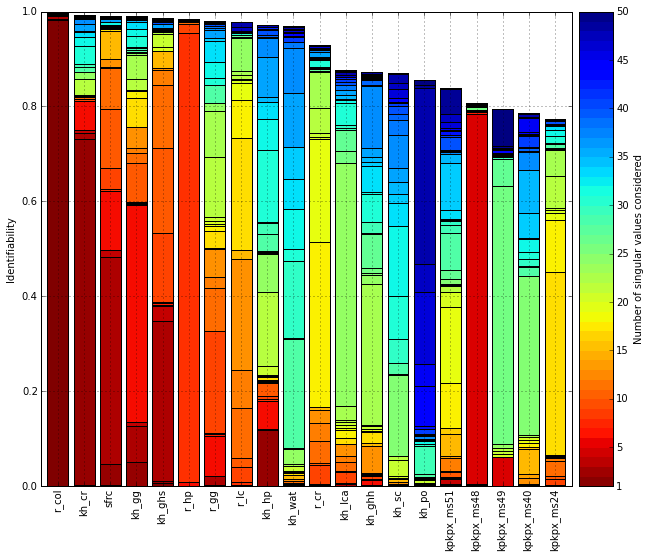

In [3]:
fig, ax = ip.plot_bar(nsingular=50)

###Spatial plot of identifiabilities in model zone 19

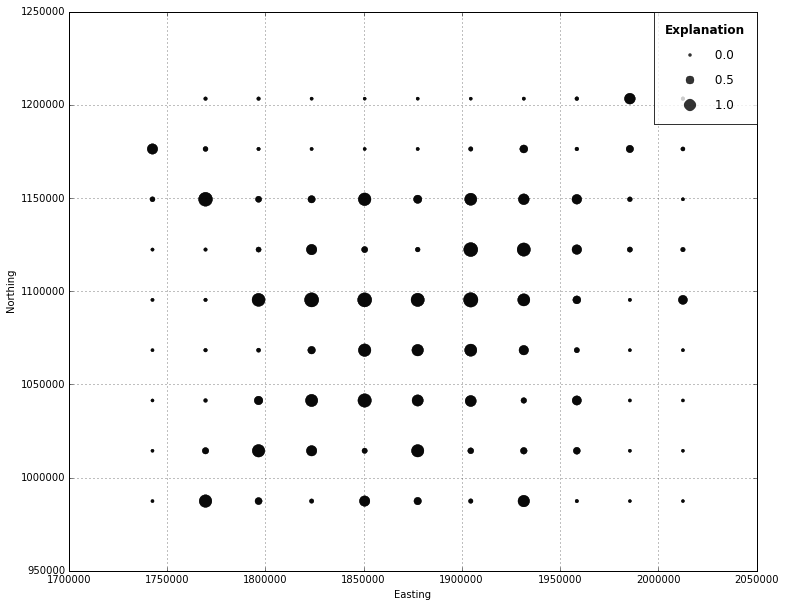

In [4]:
sp = ip.plot_spatial(nsingular=50, group_col='zone', groupinfo=19)

###Load example model using flopy

In [5]:
m = flopy.modflow.Modflow.load('Columbia.nam', model_ws='../cc/')

  ...load method not completed. default nwt file created.


###Plot pilot point identifiabilities over hydraulic conductivity field

In [8]:
xul = 1729168 # x coordinate of lower left hand corner of model
yul = 1216777 # y coordinate of lower left hand corner of model
upw = m.get_package('upw') # load the UPW package
dis = m.get_package('dis') # load the DIS package
modelmap = flopy.plot.ModelMap(model=m, xul=xul, yul=yul, rotation=0, ax=sp.ax) # make the flopy model map object
quadmesh = modelmap.plot_array(upw.hk.array[5,:,:], alpha=0.5, zorder=0, colorbar=True) # plot the hydraulic conductivity array
#cb = plt.colorbar(ax=sp.ax, mappable=quadmesh, label='Hydraulic condutivity, in feet per day')
sp.fig

//anaconda/lib/python2.7/site-packages/matplotlib/artist.py:758: MatplotlibDeprecationWarning: The set_colorbar function was deprecated in version 1.3. Use the colorbar attribute instead.
  func(v)


TypeError: set_colorbar() takes exactly 3 arguments (2 given)